In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt

In [2]:
discreptive_ex = pd.read_excel('RegressionPlot.xlsx')
table_three = pd.read_excel('Europe_3_Factors.xlsx')
table_one = pd.read_excel('Europe_MOM_Factor.xlsx')
#read the summary, firsty clean the Investment Type, only Open-End Fund reamin

In [3]:
cols = ["Fund Size","Fund Flow","Fund Return","Fund Sustainability"]
discreptive_ex[cols] = discreptive_ex[cols].replace({0:np.nan})

In [4]:
cols2 = ["Fund Size","Fund Flow","Fund Return","Fund Sustainability", "CAPM Performance", "CAPM Performance Three Factor", "CAPM Performance Four Factor"]
average = discreptive_ex.groupby('FundId')[cols2].mean()

In [ ]:
#table_three.mean()
#table_three.std()
#table_three.min()
#table_three.max()
#table_one.mean()
#table_one.std()
#table_one.min()
table_one.max()

In [ ]:
average_value = discreptive_ex[cols2].mean()
standard_deviation = discreptive_ex[cols2].std()
min_value = discreptive_ex[cols2].min()
max_value = discreptive_ex[cols2].max()

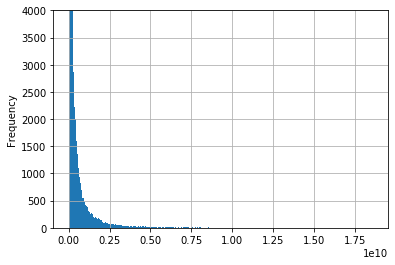

In [10]:
hist_size = discreptive_ex['Fund Size'].plot.hist(bins=1000,ylim=(0,4000),grid=True)

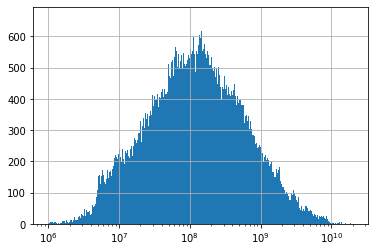

In [14]:
col_size = discreptive_ex['Fund Size'].tolist()
MIN, MAX = 1000000.0, 20000000000.0
pl.figure()
pl.hist(col_size, bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 1000))
pl.gca().set_xscale("log")
pl.grid()
pl.show()

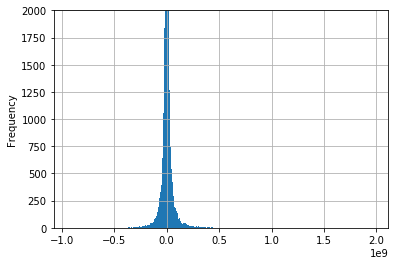

In [12]:
hist_size = discreptive_ex['Fund Flow'].plot.hist(bins=1000,ylim=(0,2000),grid=True)

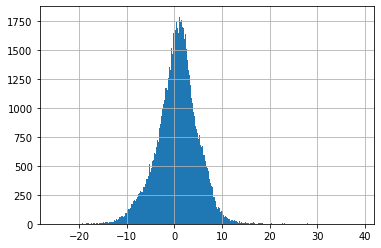

In [8]:
hist_return = discreptive_ex['Fund Return'].hist(bins=1000)

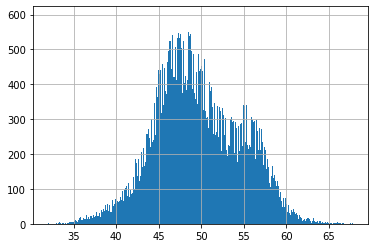

In [9]:
hist_sus = discreptive_ex['Fund Sustainability'].hist(bins=1000)

In [ ]:
smaller_10mio = average[average['Fund Size'] < 10000000]

larger_10mio = average[average['Fund Size'] >= 10000000]
ten_hundred = larger_10mio[larger_10mio['Fund Size'] < 100000000]

larger_100mio = average[average['Fund Size'] >= 100000000]
hundred_thousend = larger_100mio[larger_100mio['Fund Size'] < 1000000000]

larger_1000mio = average[average['Fund Size'] >= 1000000000]

In [22]:
sus_med = average['Fund Sustainability'].median()
low_sus = average[average['Fund Sustainability'] < sus_med]
high_sus = average[average['Fund Sustainability'] > sus_med]

In [24]:
low_sus.mean()

Fund Size                        3.503641e+08
Fund Flow                        1.048574e+06
Fund Return                      5.535629e-01
Fund Sustainability              4.535069e+01
CAPM Performance                 5.832338e-01
CAPM Performance Three Factor    3.485523e-01
CAPM Performance Four Factor     3.814596e-01
dtype: float64